In [5]:
import gym
import numpy as np
import matplotlib.pyplot as plt
from DDPG import DDPGagent
from Noise import OUNoise



In [6]:
env = gym.make("Pendulum-v0")

agent = DDPGagent(env.action_space.shape[0], env.observation_space.shape[0])
noise = OUNoise(env.action_space.shape[0])
batch_size = 128
rewards = []
avg_rewards = []

episode: 0, reward: -1405.46, average _reward: nan 

episode: 1, reward: -1720.12, average _reward: -1405.4639865111544 

episode: 2, reward: -1635.26, average _reward: -1562.7925562112318 

episode: 3, reward: -1526.21, average _reward: -1586.948929846385 

episode: 4, reward: -1506.1, average _reward: -1571.7654016850054 

episode: 5, reward: -1321.13, average _reward: -1558.6328817915262 

episode: 6, reward: -1164.82, average _reward: -1519.0493147227141 

episode: 7, reward: -1319.65, average _reward: -1468.4452292542971 

episode: 8, reward: -1513.29, average _reward: -1449.8454971182223 

episode: 9, reward: -1299.88, average _reward: -1456.8952222004998 

episode: 10, reward: -1388.19, average _reward: -1441.1937063568685 

episode: 11, reward: -1517.14, average _reward: -1439.4667238429495 

episode: 12, reward: -1213.55, average _reward: -1419.1683460065278 

episode: 13, reward: -1058.16, average _reward: -1376.9971428085805 

episode: 14, reward: -971.7, average _reward: -1

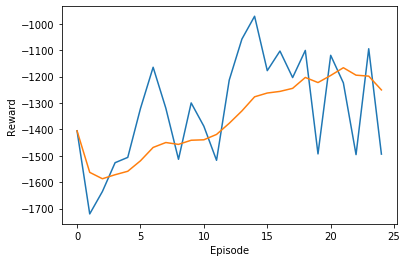

In [7]:
for episode in range(25):
    state = env.reset()
    noise.reset()
    episode_reward = 0
    for step in range(500):
        #env.render()
        action = agent.get_action(state)
        noise_action = noise.apply_noise(action, step)
        
        new_state, reward, done, _ = env.step(noise_action)
        
        agent.memory.push(state, action, reward, new_state, done)
        
        if agent.memory.count() > batch_size:
            agent.update(batch_size)
        
        state = new_state
        episode_reward += reward
        
        if done:
            print("episode: {}, reward: {}, average _reward: {} \n".format(episode, np.round(episode_reward, decimals=2), np.mean(rewards[-10:])))
            break
    
    rewards.append(episode_reward)
    avg_rewards.append(np.mean(rewards[-10:]))

plt.plot(rewards)
plt.plot(avg_rewards)
plt.plot()
plt.xlabel('Episode')
plt.ylabel('Reward')
plt.show()        